# Fragmentation of an empire
This notebook is used to define the parameters of the model, run the simulation, and extract insights by plotting variables of interest.

In [58]:
# YOUR IMPORTS HERE ....
%matplotlib inline
import matplotlib.pyplot as plt

## Without autoreload, you necessarily have to restart the notebook kernel
## when you make changes in the imported .py modules of the model.
## See the docs:
##    https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html
%reload_ext autoreload
%autoreload 2

import numpy as np
from random import sample

from model import EmpireModel

In [59]:
## SET THE PARAMETERS
params = {"width": 50, 
          "height": 50,
          "percentage_of_cops":0.3,
          "percent_of_citizens":0.6
         }

## DEFINE THE MODEL 
EmpireModel = EmpireModel(**params)

In [60]:
## RUN THE MODEL
EmpireModel.run_model()

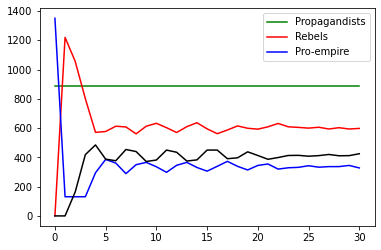

In [67]:
agent_states = EmpireModel.datacollector.get_model_vars_dataframe() ## GET THE FINAL OPINION
a=opi
len(a)
active=list()
passive=list()
cops=list()
for i in range(len(a)):
    active.append(a[i][0][0])
    passive.append(a[i][0][1])
    cops.append(a[i][0][2])
#print(active)
#agent_states.plot()
plt.plot(range(len(active)),active, color='red')
plt.plot(range(len(passive)),passive, color='blue')
plt.plot(range(len(cops)),cops, color='black')
plt.show()

In [63]:
agent_states

,AgentStates
0,"[0, 1351, 0, 890]"
1,"[1220, 131, 0, 890]"
2,"[1056, 131, 164, 890]"
3,"[801, 131, 419, 890]"
4,"[571, 295, 485, 890]"
5,"[577, 386, 388, 890]"
6,"[613, 361, 377, 890]"
7,"[608, 289, 454, 890]"
8,"[561, 350, 440, 890]"
9,"[613, 366, 372, 890]"


In [66]:
agent_opinions = EmpireModel.datacollector.get_agent_vars_dataframe()
agent_opinions

Opinion
Step AgentID          
0    (0, 0)          3
     (0, 1)          3
     (0, 2)          3
     (0, 3)          3
     (0, 4)          3
...                ...
30   (49, 45)        2
     (49, 46)        2
     (49, 47)        1
     (49, 48)        2
     (49, 49)        2

[69471 rows x 1 columns]